# 탐색적 데이터 분석 (`EDA` : Exploratory Data Analysis)
- 데이터를 보는 눈

## 1. `EDA`
- 데이터를 기술적 접근 뿐만 아니라 그 `자체만으로 인사이트를 얻어`내는 접근법

### 1-1) EDA의 Process
#### 1. 분석 목적과 변수 확인 (column)
#### 2. 데이터 전체적으로 살펴보기 (corelarion, NA(Null 값), 데이터 사이즈 등)
#### 3. 데이터의 개별 속성 파악하기

### 1-2) EDA with Example - Titanic
#### 1. `분석 목적`과 `변수 확인`
##### - `분석 목적` : 살아남은 사람들은 어떤 특징을 가지고 있었을까?
##### - `변수` 및 `key` 확인 : 총 10개 (survival (key : 0 or 1), pclass 등)

In [12]:
# 0. 라이브러리 준비

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
%matplotlib inline

In [14]:
# csv 파일 불러오기
titanic_df = pd.read_csv("./train.csv")

In [15]:
# 1. 분석의 목적과 변수 확인

# 상위 3개 데이터 확인
titanic_df.head(3)

# NaN는 결측치이며 따로 처리하는 방법이 다양하다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [16]:
# 각 Column의 데이터 타입 확인하기

titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### 2. 데이터 전체적으로 살펴보기

In [17]:
# 수치형 데이터만 얻어오기

titanic_df.describe() 
# mean : 평균
# std : 표준 편차

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# 상관계수 확인
titanic_df.corr() 
# 자기 자신과의 상관 계수는 1
# 절댓값이 1과 가까울수록 상관성이 높음

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


##### `상관성` vs `인과성`
##### `상관성` : A up, B up, ...
##### `인과성` : A -> B

In [19]:
# 결측치 확인 (NaN)

titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 3. 데이터의 개별 속성 파악하기

#### 3-1) Suevived Column

In [20]:
# 생존자, 사망자 명수는?

titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

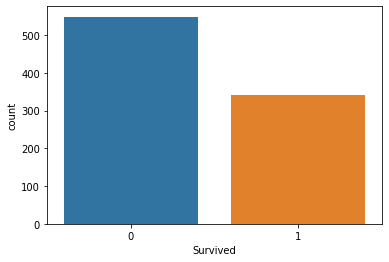

In [23]:
# 생존자수와 사망자수를 Barplot으로 그려보기

sns.countplot(x='Survived', data = titanic_df)
plt.show()

#### 3-2) Pclass

In [24]:
# Pclass에 따른 인원 파악

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [25]:
# 생존자 인원? -> 생존자는 1로 표현된다.

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [26]:
# 생존 비율?

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


[]

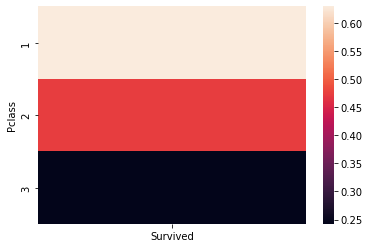

In [27]:
# 히트맵 활용

sns.heatmap(titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean())
plt.plot()

#### 3-3) Sex

In [32]:
# data type groupby 생성
titanic_df.groupby(['Survived', 'Sex'])

In [34]:
titanic_df.groupby(['Survived', 'Sex']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Survived Sex                                                                  
0        female           81      81    81   64     81     81      81    81   
         male            468     468   468  360    468    468     468   468   
1        female          233     233   233  197    233    233     233   233   
         male            109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Survived Sex                      
0        female      6        81  
         male       62       468  
1        female     91       231  
         male       45       109

In [33]:
titanic_df.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

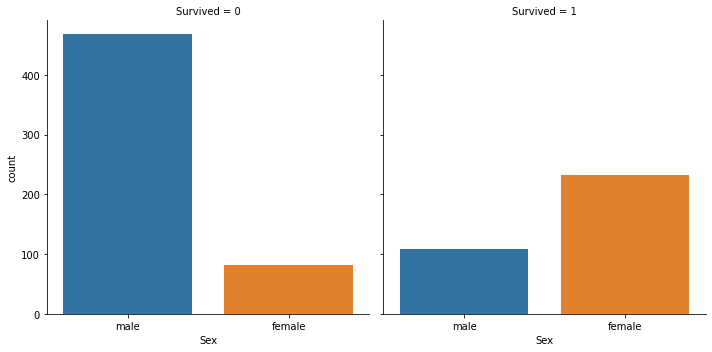

In [35]:
# sns.catplot
sns.catplot(x='Sex', col='Survived', kind='count', data=titanic_df)
plt.show()

#### 3-4) Age (NaN 존재)

In [36]:
# Age column만 가져오기
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

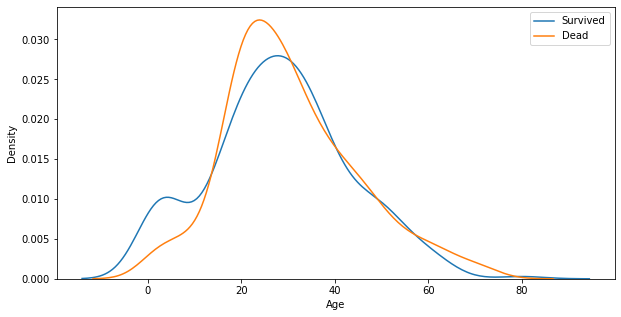

In [37]:
# Survived 1, 0과 Age의 결향성

# figure -> axis -> plot
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=titanic_df[titanic_df.Survived == 1]['Age'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived == 0]['Age'], ax=ax)

plt.legend(['Survived', 'Dead'])
plt.show()

#### Appendix 1. Sex + Pclass vs Survived

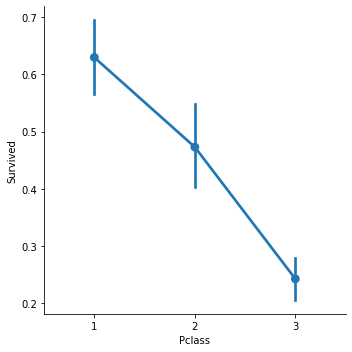

In [40]:
# 단일 column을 hue를 사용하여 분할하여 관찰하기
sns.catplot(x='Pclass', y='Survived', kind='point', data=titanic_df)
plt.show()

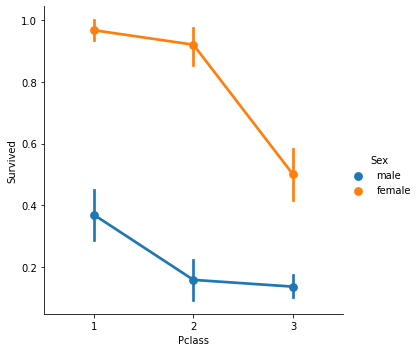

In [41]:
# 단일 column을 hue를 사용하여 분할하여 관찰하기
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=titanic_df)
plt.show()

#### Appendix 2. Age + Pclass

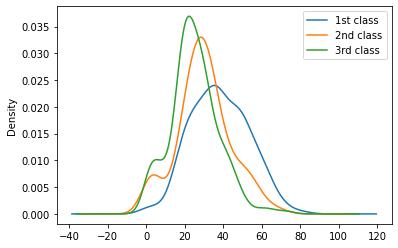

In [43]:
# Age gragh with Pclass

titanic_df['Age'][titanic_df.Pclass == 1].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 2].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 3].plot(kind='kde')

plt.legend(['1st class', '2nd class', '3rd class'])
plt.show()